In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_v2.csv')

In [3]:
df.head(10)

,County Name,Year,Store#,Bottles Sold,Volume Sold (Gallons),Pack,Sales,Humidity%,Wind_speed,precipitation,...,Inflation,Population,School,Recreation services PCE,Gasoline PCE,Food services and accommodations PCE,Food and beverages PCE,Personal Income,Vehicle Registrations PCE,County ID
0,ADAIR,2012,10,34888,8791.51,50689,413596.98,68.934165,7.872852,0.000000,...,2.083333,7468,5,2660.0,2031.0,5732.6,2660.0,41157.000000,13441,1
1,ADAIR,2013,8,32081,8223.58,44627,377727.77,76.008622,6.784116,0.000000,...,1.483333,7387,5,2663.0,1978.0,5946.4,2663.0,43166.000000,13496,1
2,ADAIR,2014,8,34452,8814.93,47575,412648.69,77.047807,7.034197,0.000058,...,1.633333,7368,5,2728.0,1874.0,6191.8,2728.0,43405.000000,13584,1
3,ADAIR,2015,8,35046,8968.74,49345,424644.71,78.952758,7.559636,0.001599,...,0.125000,7145,5,2773.0,1470.0,6513.4,2773.0,45766.000000,13678,1
4,ADAIR,2016,7,36035,9174.19,56514,443341.75,63.853496,6.124034,0.001007,...,1.266667,7005,5,2819.0,1297.0,6750.4,2819.0,44952.000000,13806,1
5,ADAIR,2017,6,37405,9396.83,57271,461558.84,72.380320,5.471796,0.000907,...,2.116667,7051,5,2845.0,1425.0,6927.1,2845.0,46827.000000,13937,1
6,ADAIR,2018,6,38275,9529.50,59653,481733.23,77.963246,5.110188,0.002041,...,2.450000,7074,5,2854.0,1582.0,7133.7,2854.0,49610.000000,14323,1
7,ADAIR,2019,6,34360,7808.70,54791,423505.86,82.800657,6.527074,0.003522,...,1.816667,7152,5,2819.0,1501.0,7258.4,2819.0,49947.000000,14394,1
8,ADAIR,2020,6,36637,7656.40,55055,446225.38,81.794334,4.037873,0.001925,...,1.233333,7496,5,3050.0,1104.0,6167.1,3050.0,54324.000000,14695,1
9,ADAIR,2021,7,37830,7269.96,58798,452442.93,77.353649,7.189763,0.002634,...,4.700000,7541,5,3255.0,1656.0,7877.1,3255.0,46572.666667,14910,1


In [4]:
df.shape

(970, 22)

In [5]:
list(df.columns)

['County Name',
 'Year',
 'Store#',
 'Bottles Sold',
 'Volume Sold (Gallons)',
 'Pack',
 'Sales',
 'Humidity%',
 'Wind_speed',
 'precipitation',
 'temp_F',
 'UNEMPLOYMENT RATE',
 'Inflation',
 'Population',
 'School',
 'Recreation services PCE',
 'Gasoline PCE',
 'Food services and accommodations PCE',
 'Food and beverages PCE',
 'Personal Income',
 'Vehicle Registrations PCE',
 'County ID']

In [6]:
len(df.columns)

22

In [7]:
df.isna().sum()

County Name                             0
Year                                    0
Store#                                  0
Bottles Sold                            0
Volume Sold (Gallons)                   0
Pack                                    0
Sales                                   0
Humidity%                               0
Wind_speed                              0
precipitation                           0
temp_F                                  0
UNEMPLOYMENT RATE                       0
Inflation                               0
Population                              0
School                                  0
Recreation services PCE                 0
Gasoline PCE                            0
Food services and accommodations PCE    0
Food and beverages PCE                  0
Personal Income                         0
Vehicle Registrations PCE               0
County ID                               0
dtype: int64

> Correlation heat map by Jerry

/var/folders/c6/pr4rl_t1569173b54gx1vrlr0000gn/T/ipykernel_52713/3583815144.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2[df2["Year"]==2012].corr()


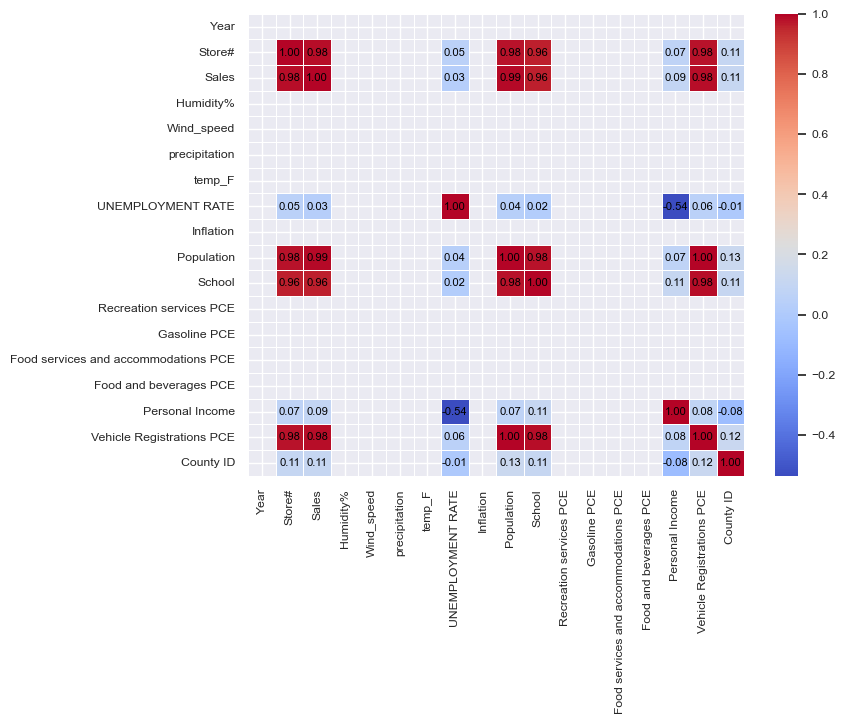

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.drop(columns=['Bottles Sold','Volume Sold (Gallons)', 'Pack'])
corr_matrix = df2[df2["Year"]==2012].corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the size of the heatmap
sns.set(font_scale=0.8)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'fontsize':8, 'color':'black'}, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, fmt='.2f', linewidths=.5)


plt.show() #22

### #Splitting the data

As for whether to use the testing data in the hidden layer or the input layer of the neural network, the answer is that you would typically only use the training data to adjust the weights and biases of the network during training. The testing data is used only for evaluation, not for adjusting the network's parameters.

Use the training data to train your neural network, and the testing data to evaluate its performance

In [9]:
def check_train_test():
    print(f'X_train.shape: {X_train.shape}')
    print(f'X_test.shape: {X_test.shape}')
    print(f'y_train.shape: {y_train.shape}')
    print(f'y_test.shape: {y_test.shape}')
    print('-------------------------')
    print(f'X_train.isna().sum(): {X_train.isna().sum().sum()}')
    print(f'X_test.isna().sum(): {X_test.isna().sum().sum()}')
    print(f'y_train.isna().sum(): {y_train.isna().sum().sum()}')
    print(f'y_test.isna().sum(): {y_test.isna().sum().sum()}')

### #Neural Network

### Model 1

- Variable selection

In [10]:
import sklearn

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(["Sales","County Name",'Volume Sold (Gallons)', 'Pack'],axis = 1)

y = df[["Sales"]]

selector = SelectKBest(f_regression, k=12)

X_selected = selector.fit_transform(X, y)

from sklearn.feature_selection import SelectKBest, f_regression

selected_features = X.columns[selector.get_support()]

# Print the selected features
print(selected_features)

Index(['Year', 'Store#', 'Bottles Sold', 'precipitation', 'UNEMPLOYMENT RATE',
       'Population', 'School', 'Recreation services PCE',
       'Food and beverages PCE', 'Personal Income',
       'Vehicle Registrations PCE', 'County ID'],
      dtype='object')


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
len(selected_features)

12

In [13]:
#Feature selection

# Step 1 : Choose DV and IV
y = df[["Sales"]]

#include feature selection variable only
X = df[['Year', 'Store#', 'Bottles Sold', 'precipitation', 'temp_F','UNEMPLOYMENT RATE', 'Population', 'School', \
        'Food and beverages PCE', 'Personal Income', 'Vehicle Registrations PCE']]

dummy = pd.get_dummies(df["County ID"], prefix = "CCounty")
X = X.join(dummy)
X.head()

,Year,Store#,Bottles Sold,precipitation,temp_F,UNEMPLOYMENT RATE,Population,School,Food and beverages PCE,Personal Income,...,CCounty_90,CCounty_91,CCounty_92,CCounty_93,CCounty_94,CCounty_95,CCounty_96,CCounty_97,CCounty_98,CCounty_99
0,2012,10,34888,0.000000,51.947048,4.375000,7468,5,2660.0,41157.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,8,32081,0.000000,45.875008,4.225000,7387,5,2663.0,43166.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,8,34452,0.000058,46.119096,4.033333,7368,5,2728.0,43405.0,...,0,0,0,0,0,0,0,0,0,0
3,2015,8,35046,0.001599,49.231278,3.208333,7145,5,2773.0,45766.0,...,0,0,0,0,0,0,0,0,0,0
4,2016,7,36035,0.001007,51.170135,2.908333,7005,5,2819.0,44952.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.columns

Index(['Year', 'Store#', 'Bottles Sold', 'precipitation', 'temp_F',
       'UNEMPLOYMENT RATE', 'Population', 'School', 'Food and beverages PCE',
       'Personal Income',
       ...
       'CCounty_90', 'CCounty_91', 'CCounty_92', 'CCounty_93', 'CCounty_94',
       'CCounty_95', 'CCounty_96', 'CCounty_97', 'CCounty_98', 'CCounty_99'],
      dtype='object', length=110)

- Splitting

In [15]:
from sklearn.model_selection import train_test_split

# Normalize the input data
X = (X - X.mean()) / X.std()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
check_train_test()

X_train.shape: (776, 110)
X_test.shape: (194, 110)
y_train.shape: (776, 1)
y_test.shape: (194, 1)
-------------------------
X_train.isna().sum(): 0
X_test.isna().sum(): 0
y_train.isna().sum(): 0
y_test.isna().sum(): 0


In [17]:
# Define the input layer
input_layer_size = X.shape[1]  # Number of input variables
input_layer = np.array(X_train)

In [18]:
input_layer

array([[-0.85213985, -0.42683232, -0.2978516 , ..., -0.10200945,
        -0.10200945, -0.10200945],
       [ 1.23605127,  0.03506432, -0.04342528, ..., -0.10200945,
        -0.10200945, -0.10200945],
       [ 0.19195571, -0.25886991, -0.2916516 , ..., -0.10200945,
        -0.10200945, -0.10200945],
       ...,
       [ 0.53998757, -0.1748887 , -0.1993831 , ..., -0.10200945,
        -0.10200945, -0.10200945],
       [-0.85213985, -0.46882292, -0.36528877, ..., -0.10200945,
        -0.10200945, -0.10200945],
       [ 0.19195571, -0.38484172, -0.30219508, ..., -0.10200945,
        -0.10200945, -0.10200945]])

In [19]:
input_layer_size

110

In [20]:
# Define the hidden layer
hidden_layer_size = 110  # Number of neurons in the hidden layer
hidden_layer_weights = np.random.randn(input_layer_size, hidden_layer_size)
hidden_layer_bias = np.zeros((1, hidden_layer_size))

>Documentation

>[np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
: perform dot product of two arrays

- Prediction

#Using the 11 variables selected in selected_features

In [21]:
import numpy as np

def make_prediction_11():
    global output_layer_activation, test_error,output_layer_weights,output_layer_bias

    # Define the input layer
    input_layer_size = X_train.shape[1]  # Number of input variables
    input_layer = X_train

    # Define the hidden layer
    hidden_layer_size = 11  # Number of neurons in the hidden layer
    hidden_layer_weights = np.random.randn(input_layer_size, hidden_layer_size)
    hidden_layer_bias = np.zeros((1, hidden_layer_size))
    hidden_layer_activation = np.maximum(0, np.dot(input_layer, hidden_layer_weights) + hidden_layer_bias)

    # Define the output layer
    output_layer_size = y_train.shape[1]  # Number of output variables
    output_layer_weights = np.random.randn(hidden_layer_size, output_layer_size)
    output_layer_bias = np.zeros((1, output_layer_size))
    output_layer_activation = np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias

    # Print the output layer activation
    print("Sales:", output_layer_activation[0][0])

    #------------------------------------Calculate test_error------------------------------------
    #Make predictions on testing data
    test_hidden_layer_activation = np.maximum(0, np.dot(X_test, hidden_layer_weights) + hidden_layer_bias)
    test_output_layer_activation = np.dot(test_hidden_layer_activation, output_layer_weights) + output_layer_bias

    #Calculate testing error
    test_error = np.mean((test_output_layer_activation - y_test)**2)

    #Print the testing error
    print("\nTesting error:", test_error)

In [22]:
make_prediction_11()

Sales: 24.201743505842174

Testing error: Sales    3.009175e+13
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [23]:
def make_prediction_11_loop(num):
    global sales_11, error_11

    sales_11, error_11 = [],[]

    for i in range(num):
        make_prediction_11()

        #store the results of the output layer in a list
        sales_11.append(output_layer_activation[0][0])
        error_11.append(test_error)

        print('--------------------------------------')
    #return sales_11,error_11

    #Calculate the mean of sales & error 
    print(f'Average predicted sales: {sum(sales_11)/len(sales_11)}')
    print(f'Average predicted error: {sum(error_11)/len(error_11)}')


In [24]:
make_prediction_11_loop(100)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

Sales: 18.256645129019674

Testing error: Sales    3.009168e+13
dtype: float64
--------------------------------------
Sales: 7.93470582028091

Testing error: Sales    3.009163e+13
dtype: float64
--------------------------------------
Sales: -53.45158344023101

Testing error: Sales    3.009170e+13
dtype: float64
--------------------------------------
Sales: 5.321871745438277

Testing error: Sales    3.009172e+13
dtype: float64
--------------------------------------
Sales: 3.60394227458717

Testing error: Sales    3.009178e+13
dtype: float64
--------------------------------------
Sales: 22.42030442310948

Testing error: Sales    3.009184e+13
dtype: float64
--------------------------------------
Sales: 30.496739385209825

Testing error: Sales    3.009169e+13
dtype: float64
--------------------------------------
Sales: -15.359082770242066

Testing error: Sales    3.009178e+13
dtype: float64
--------------------------------------
Sales: 38.636866692384515

Testing error: Sales    3.009170e+

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

In [25]:
import re

error_11_numeric = []

for item in error_11:
    #print(type(item)) #pandas.core.series.Series
    error_11_numeric.append(float(re.findall('\d+\.\d+', str(item))[0]))

print(error_11_numeric[:5])

df_prediction_11 = pd.DataFrame({'Sales':sales_11,'Error(e+13)':error_11_numeric})
df_prediction_11.head()

[3.009168, 3.009163, 3.00917, 3.009172, 3.009178]


,Sales,Error(e+13)
0,18.256645,3.009168
1,7.934706,3.009163
2,-53.451583,3.009170
3,5.321872,3.009172
4,3.603942,3.009178


In [26]:
#Average predicted sales
df_prediction_11['Sales'].mean()

0.7259970468051682

In [27]:
#Average prediction error --- unit = e+13
df_prediction_11['Error(e+13)'].mean()

3.00917276

In [64]:
X.shape[1]

110

#Using all the variables (including dummy variables)

In [28]:
import numpy as np

def make_prediction_withDummy():
    global output_layer_activation, test_error,output_layer_weights,output_layer_bias

    # Define the input layer
    input_layer_size = X_train.shape[1]  # Number of input variables
    input_layer = X_train

    # Define the hidden layer
    hidden_layer_size = X.shape[1]  # Number of neurons in the hidden layer
    hidden_layer_weights = np.random.randn(input_layer_size, hidden_layer_size)
    hidden_layer_bias = np.zeros((1, hidden_layer_size))
    hidden_layer_activation = np.maximum(0, np.dot(input_layer, hidden_layer_weights) + hidden_layer_bias)

    # Define the output layer
    output_layer_size = y_train.shape[1]  # Number of output variables
    output_layer_weights = np.random.randn(hidden_layer_size, output_layer_size)
    output_layer_bias = np.zeros((1, output_layer_size))
    output_layer_activation = np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias

    # Print the output layer activation
    print("Sales:", output_layer_activation[0][0])

    #------------------------------------Calculate test_error------------------------------------
    #Make predictions on testing data
    test_hidden_layer_activation = np.maximum(0, np.dot(X_test, hidden_layer_weights) + hidden_layer_bias)
    test_output_layer_activation = np.dot(test_hidden_layer_activation, output_layer_weights) + output_layer_bias

    #Calculate testing error
    test_error = np.mean((test_output_layer_activation - y_test)**2)

    #Print the testing error
    print("\nTesting error:", test_error)

In [29]:
make_prediction_withDummy()

Sales: -115.60145755800622

Testing error: Sales    3.009232e+13
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [30]:
def make_prediction_withDummy_loop(num):

    global sales_withDummy, error_withDummy

    sales_withDummy, error_withDummy = [],[]

    for i in range(num):
        make_prediction_11()

        #store the results of the output layer in a list
        sales_withDummy.append(output_layer_activation[0][0])
        error_withDummy.append(test_error)

        print('--------------------------------------')
    #return sales_all,error_all

    #Calculate the mean of sales & error 
    print(f'Average predicted sales: {sum(sales_withDummy)/len(sales_withDummy)}')
    print(f'Average predicted error: {sum(error_withDummy)/len(error_withDummy)}')

In [31]:
make_prediction_withDummy_loop(100)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

Sales: 16.486949353280306

Testing error: Sales    3.009181e+13
dtype: float64
--------------------------------------
Sales: 13.936655318497174

Testing error: Sales    3.009168e+13
dtype: float64
--------------------------------------
Sales: -17.620588357416043

Testing error: Sales    3.009181e+13
dtype: float64
--------------------------------------
Sales: -4.97905877901996

Testing error: Sales    3.009185e+13
dtype: float64
--------------------------------------
Sales: 14.62241705238027

Testing error: Sales    3.009173e+13
dtype: float64
--------------------------------------
Sales: -19.064232805849443

Testing error: Sales    3.009173e+13
dtype: float64
--------------------------------------
Sales: -11.698727449517005

Testing error: Sales    3.009177e+13
dtype: float64
--------------------------------------
Sales: 0.7676366257569283

Testing error: Sales    3.009164e+13
dtype: float64
--------------------------------------
Sales: 0.7710508440342521

Testing error: Sales    3.00

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

In [32]:
import re

error_withDummy_numeric = []

for item in error_withDummy:
    #print(type(item)) #pandas.core.series.Series
    error_withDummy_numeric.append(float(re.findall('\d+\.\d+', str(item))[0]))

print(error_withDummy_numeric[:5])

df_prediction_withDummy = pd.DataFrame({'Sales':sales_withDummy,'Error(e+13)':error_withDummy_numeric})
df_prediction_withDummy.head()

[3.009181, 3.009168, 3.009181, 3.009185, 3.009173]


,Sales,Error(e+13)
0,16.486949,3.009181
1,13.936655,3.009168
2,-17.620588,3.009181
3,-4.979059,3.009185
4,14.622417,3.009173


In [33]:
#Average predicted sales
df_prediction_withDummy['Sales'].mean()

4.630084992455888

In [34]:
#Average prediction error --- unit = e+13
df_prediction_withDummy['Error(e+13)'].mean()

3.0091724300000005

###  Model 2

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('clean_v2.csv')

# Extract the relevant columns
X = data[['Year',
 'Store#',
 'Bottles Sold',
 'Volume Sold (Gallons)',
 'Pack',
 'Sales',
 'Humidity%',
 'Wind_speed',
 'precipitation',
 'temp_F',
 'UNEMPLOYMENT RATE',
 'Inflation',
 'Population',
 'School',
 'Recreation services PCE',
 'Gasoline PCE',
 'Food services and accommodations PCE',
 'Food and beverages PCE',
 'Personal Income',
 'Vehicle Registrations PCE',
 'County ID']]

y = data[['Sales']]

# Normalize the input data
X = (X - X.mean()) / X.std()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
check_train_test()

X_train.shape: (776, 21)
X_test.shape: (194, 21)
y_train.shape: (776, 1)
y_test.shape: (194, 1)
-------------------------
X_train.isna().sum(): 0
X_test.isna().sum(): 0
y_train.isna().sum(): 0
y_test.isna().sum(): 0


In [37]:
import numpy as np

def make_prediction_all():
    global output_layer_activation, test_error,output_layer_weights,output_layer_bias

    # Define the input layer
    input_layer_size = X_train.shape[1]  # Number of input variables
    input_layer = X_train

    # Define the hidden layer
    hidden_layer_size = 110  # Number of neurons in the hidden layer
    hidden_layer_weights = np.random.randn(input_layer_size, hidden_layer_size)
    hidden_layer_bias = np.zeros((1, hidden_layer_size))
    hidden_layer_activation = np.maximum(0, np.dot(input_layer, hidden_layer_weights) + hidden_layer_bias)

    # Define the output layer
    output_layer_size = y_train.shape[1]  # Number of output variables
    output_layer_weights = np.random.randn(hidden_layer_size, output_layer_size)
    output_layer_bias = np.zeros((1, output_layer_size))
    output_layer_activation = np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias

    # Print the output layer activation
    print("Sales:", output_layer_activation[0][0])

    #------------------------------------Calculate test_error------------------------------------
    #Make predictions on testing data
    test_hidden_layer_activation = np.maximum(0, np.dot(X_test, hidden_layer_weights) + hidden_layer_bias)
    test_output_layer_activation = np.dot(test_hidden_layer_activation, output_layer_weights) + output_layer_bias

    #Calculate testing error
    test_error = np.mean((test_output_layer_activation - y_test)**2)

    #Print the testing error
    print("\nTesting error:", test_error)

In [38]:
make_prediction_all()

Sales: 33.863669145669164

Testing error: Sales    7.053446e+13
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
def make_prediction_all_loop(num):

    global sales_all, error_all

    sales_all, error_all = [],[]

    for i in range(num):
        make_prediction_all()

        #store the results of the output layer in a list
        sales_all.append(output_layer_activation[0][0])
        error_all.append(test_error)

        print('--------------------------------------')
    #return sales_all,error_all

    #Calculate the mean of sales & error 
    print(f'Average predicted sales: {sum(sales_all)/len(sales_all)}')
    print(f'Average predicted error: {sum(error_all)/len(error_all)}')

In [40]:
make_prediction_all_loop(100)

Sales: -9.613747369518643

Testing error: Sales    7.053481e+13
dtype: float64
--------------------------------------
Sales: 17.16736813572086

Testing error: Sales    7.053454e+13
dtype: float64
--------------------------------------
Sales: 71.98302716306746

Testing error: Sales    7.053460e+13
dtype: float64
--------------------------------------
Sales: 23.955539996964106

Testing error: Sales    7.053440e+13
dtype: float64
--------------------------------------
Sales: -42.84046155342347

Testing error: Sales    7.053496e+13
dtype: float64
--------------------------------------
Sales: -10.924727354437374

Testing error: Sales    7.053447e+13
dtype: float64
--------------------------------------
Sales: 50.09533462354387

Testing error: Sales    7.053459e+13
dtype: float64
--------------------------------------
Sales: -24.27487967129894

Testing error: Sales    7.053493e+13
dtype: float64
--------------------------------------
Sales: 20.089148956639114

Testing error: Sales    7.05349

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

Sales: -28.923719319487425

Testing error: Sales    7.053477e+13
dtype: float64
--------------------------------------
Sales: -7.747300064548046

Testing error: Sales    7.053536e+13
dtype: float64
--------------------------------------
Sales: -70.02079247257568

Testing error: Sales    7.053544e+13
dtype: float64
--------------------------------------
Sales: 45.444496363587064

Testing error: Sales    7.053495e+13
dtype: float64
--------------------------------------
Sales: 22.885466520337783

Testing error: Sales    7.053525e+13
dtype: float64
--------------------------------------


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Sales: 20.881694609597083

Testing error: Sales    7.053446e+13
dtype: float64
--------------------------------------
Sales: -34.18997785253054

Testing error: Sales    7.053509e+13
dtype: float64
--------------------------------------
Sales: 73.40170931627009

Testing error: Sales    7.053416e+13
dtype: float64
--------------------------------------
Sales: -1.5905667001033388

Testing error: Sales    7.053458e+13
dtype: float64
--------------------------------------
Sales: -33.32935241328798

Testing error: Sales    7.053440e+13
dtype: float64
--------------------------------------
Sales: -32.86410609847028

Testing error: Sales    7.053521e+13
dtype: float64
--------------------------------------
Sales: 23.888951266478436

Testing error: Sales    7.053506e+13
dtype: float64
--------------------------------------
Average predicted sales: -1.839261070006403
Average predicted error: Sales    7.053483e+13
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.11/si

In [62]:
import re

error_all_numeric = []

for item in error_all:
    #print(type(item)) #pandas.core.series.Series
    error_all_numeric.append(float(re.findall('\d+\.\d+', str(item))[0]))

#print(error_all_numeric[:5])

df_prediction_all = pd.DataFrame({'Sales':sales_all,'Error(e+13)':error_all_numeric})
df_prediction_all.head()

,Sales,Error(e+13)
0,-9.613747,7.053481
1,17.167368,7.053454
2,71.983027,7.053460
3,23.955540,7.053440
4,-42.840462,7.053496


In [42]:
#Average predicted sales
df_prediction_all['Sales'].mean()

-1.8392610700064052

In [43]:
#Average prediction error --- unit = e+13
df_prediction_all['Error(e+13)'].mean()

70534834818494.56

### Neural Network (with Sckit Learn) --by Jerry

In [44]:
import numpy as np
from scipy import stats
import pandas as pd

In [45]:
df1 = pd.read_csv('clean_v2.csv')
df1.head()

,County Name,Year,Store#,Bottles Sold,Volume Sold (Gallons),Pack,Sales,Humidity%,Wind_speed,precipitation,...,Inflation,Population,School,Recreation services PCE,Gasoline PCE,Food services and accommodations PCE,Food and beverages PCE,Personal Income,Vehicle Registrations PCE,County ID
0,ADAIR,2012,10,34888,8791.51,50689,413596.98,68.934165,7.872852,0.000000,...,2.083333,7468,5,2660.0,2031.0,5732.6,2660.0,41157.0,13441,1
1,ADAIR,2013,8,32081,8223.58,44627,377727.77,76.008622,6.784116,0.000000,...,1.483333,7387,5,2663.0,1978.0,5946.4,2663.0,43166.0,13496,1
2,ADAIR,2014,8,34452,8814.93,47575,412648.69,77.047807,7.034197,0.000058,...,1.633333,7368,5,2728.0,1874.0,6191.8,2728.0,43405.0,13584,1
3,ADAIR,2015,8,35046,8968.74,49345,424644.71,78.952758,7.559636,0.001599,...,0.125000,7145,5,2773.0,1470.0,6513.4,2773.0,45766.0,13678,1
4,ADAIR,2016,7,36035,9174.19,56514,443341.75,63.853496,6.124034,0.001007,...,1.266667,7005,5,2819.0,1297.0,6750.4,2819.0,44952.0,13806,1


In [46]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df1.drop(["Sales","County Name",'Volume Sold (Gallons)', 'Pack'],axis = 1)

y = df1["Sales"]

selector = SelectKBest(f_regression, k=12)

X_selected = selector.fit_transform(X, y)

from sklearn.feature_selection import SelectKBest, f_regression

selected_features = X.columns[selector.get_support()]

# Print the selected features
print(selected_features)


Index(['Year', 'Store#', 'Bottles Sold', 'precipitation', 'UNEMPLOYMENT RATE',
       'Population', 'School', 'Recreation services PCE',
       'Food and beverages PCE', 'Personal Income',
       'Vehicle Registrations PCE', 'County ID'],
      dtype='object')


In [47]:
#Feature selection

# Step 1 : Choose DV and IV
y = df1["Sales"]

#include feature selection variable only
X = df1[['Year', 'Store#', 'Bottles Sold', 'precipitation', 'temp_F','UNEMPLOYMENT RATE', 'Population', 'School', 'Food and beverages PCE', 'Personal Income', 'Vehicle Registrations PCE']]

#include all variables
#X = df1.drop(["Sales","County Name",'Volume Sold (Gallons)', 'Pack','County ID'],axis = 1)

dummy = pd.get_dummies(df1["County ID"], prefix = "CCounty")
X = X.join(dummy)
X.head()

,Year,Store#,Bottles Sold,precipitation,temp_F,UNEMPLOYMENT RATE,Population,School,Food and beverages PCE,Personal Income,...,CCounty_90,CCounty_91,CCounty_92,CCounty_93,CCounty_94,CCounty_95,CCounty_96,CCounty_97,CCounty_98,CCounty_99
0,2012,10,34888,0.000000,51.947048,4.375000,7468,5,2660.0,41157.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,8,32081,0.000000,45.875008,4.225000,7387,5,2663.0,43166.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,8,34452,0.000058,46.119096,4.033333,7368,5,2728.0,43405.0,...,0,0,0,0,0,0,0,0,0,0
3,2015,8,35046,0.001599,49.231278,3.208333,7145,5,2773.0,45766.0,...,0,0,0,0,0,0,0,0,0,0
4,2016,7,36035,0.001007,51.170135,2.908333,7005,5,2819.0,44952.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.metrics import r2_score

In [49]:
#Split the data into train set and test set
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_test = X_test.reset_index(drop=True)
X_test.head()

,Year,Store#,Bottles Sold,precipitation,temp_F,UNEMPLOYMENT RATE,Population,School,Food and beverages PCE,Personal Income,...,CCounty_90,CCounty_91,CCounty_92,CCounty_93,CCounty_94,CCounty_95,CCounty_96,CCounty_97,CCounty_98,CCounty_99
0,2017,2,5175,0.000907,52.374315,2.758333,8533,4,2845.0,39218.000000,...,0,0,0,0,0,0,0,0,0,0
1,2021,5,16639,0.002634,58.984765,3.016667,7659,7,3255.0,32329.888889,...,0,0,0,0,0,0,0,0,0,0
2,2020,11,82830,0.001925,52.655436,4.341667,15039,8,3050.0,50276.000000,...,0,0,0,0,0,0,0,0,0,0
3,2017,4,72314,0.000907,52.374315,3.016667,18219,6,2845.0,43132.000000,...,0,0,0,0,0,0,0,0,0,0
4,2012,12,111187,0.000000,51.947048,4.333333,26136,13,2660.0,43347.000000,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0      61646.50
1     211580.55
2    1055404.38
3     982276.77
4    1409517.58
Name: Sales, dtype: float64

In [52]:
demo = X_test
demo = pd.merge(demo, df1[["County Name","County ID"]], left_index=True,right_index=True, how="left")
demo

,Year,Store#,Bottles Sold,precipitation,temp_F,UNEMPLOYMENT RATE,Population,School,Food and beverages PCE,Personal Income,...,CCounty_92,CCounty_93,CCounty_94,CCounty_95,CCounty_96,CCounty_97,CCounty_98,CCounty_99,County Name,County ID
0,2017,2,5175,0.000907,52.374315,2.758333,8533,4,2845.0,39218.000000,...,0,0,0,0,0,0,0,0,ADAIR,1
1,2021,5,16639,0.002634,58.984765,3.016667,7659,7,3255.0,32329.888889,...,0,0,0,0,0,0,0,0,ADAIR,1
2,2020,11,82830,0.001925,52.655436,4.341667,15039,8,3050.0,50276.000000,...,0,0,0,0,0,0,0,0,ADAIR,1
3,2017,4,72314,0.000907,52.374315,3.016667,18219,6,2845.0,43132.000000,...,0,0,0,0,0,0,0,0,ADAIR,1
4,2012,12,111187,0.000000,51.947048,4.333333,26136,13,2660.0,43347.000000,...,0,0,0,0,0,0,0,0,ADAIR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2016,12,51031,0.001007,51.170135,4.091667,12839,9,2819.0,44614.000000,...,0,0,0,0,0,0,0,1,CLARKE,20
190,2012,153,3746671,0.000000,51.947048,5.200000,444671,128,2660.0,46034.000000,...,0,0,0,0,0,0,0,0,CLAY,21
191,2015,7,103904,0.001599,49.231278,3.075000,22145,13,2773.0,51288.000000,...,1,0,0,0,0,0,0,0,CLAY,21
192,2015,6,67006,0.001599,49.231278,4.858333,12577,8,2773.0,35531.000000,...,0,0,0,0,0,0,0,0,CLAY,21


# Neural Network: sckit learn - demo

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create an MLPRegressor model with 2 hidden layers
mlp = MLPRegressor(hidden_layer_sizes=(50,50),  random_state=42) # too many neurons = overfitting

# Train the model on the training set
mlp.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = mlp.predict(X_test)
# Calculate the mean squared error of the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("The coefficient of determination of the prediction (Accuracy):", mlp.score(X_test, y_test))

Mean absolute error: 220003.3370877
Mean squared error: 272959071607.66156
The coefficient of determination of the prediction (Accuracy): 0.9962309199676869


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
#input the range

rng  = 194

test = X_test.loc[0:rng,:].values.tolist()

for i in range(0,rng):
    
    #print("Original Value",test[i][0],":",test[i][1])
    
    test[i][1] = (test[i][1]+1) #m+1 prediction
    
    #print("Predicted value",test[i][0],":",test[i][1])

#print("------------------------Predicted Value-----------------------------")
y_pred = mlp.predict(test)
#print(y_pred)
#print()

#print("---------------------------Actual Value-----------------------------")
actual = y_test.loc[0:rng].values.tolist()

actlst = []

for i in range(0,rng):
    actlst.append(actual[i])
    
#print(actlst)
#print()

difflst = y_pred - actlst

nenamelst,neyearlst,decrelst,ponamelst,poyearlst,increlst = [],[],[],[],[],[]

for i in range(len(actlst)):
    
    if difflst[i] <0:
        nenamelst.append(demo.loc[i:i]['County Name'].values[0])
        neyearlst.append(demo.loc[i:i]['Year'].values[0])
        decrelst.append(difflst[i])
        
    elif difflst[i]>0:
        ponamelst.append(demo.loc[i:i]['County Name'].values[0])
        poyearlst.append(demo.loc[i:i]['Year'].values[0])
        increlst.append(difflst[i])
        

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [55]:
print("----------------Below is the county with year in which sales become lower after m + 1 ---------------")  
nw_nve =  pd.DataFrame({'Year': neyearlst,'County Name': nenamelst, 'Decrease By': decrelst})
nw_nve['Decrease By'] = nw_nve['Decrease By'].apply(lambda x: format(x, '.2f'))
nw_nve

----------------Below is the county with year in which sales become lower after m + 1 ---------------


,Year,County Name,Decrease By
0,2017,ADAIR,-36653.65
1,2021,ADAIR,-36791.19
2,2020,ADAIR,-18364.40
3,2017,ADAIR,-51793.03
4,2018,ADAIR,-55673.40
...,...,...,...
112,2015,CLARKE,-19437.14
113,2013,CLARKE,-30110.91
114,2019,CLARKE,-43313.61
115,2016,CLARKE,-563.12


In [56]:
print("----------------Below is the county with year in which sales become higher after m + 1 ---------------")  
nw_pve =  pd.DataFrame({'Year': poyearlst,'County Name': ponamelst, 'Increase By': increlst})
nw_pve['Increase By'] = nw_pve['Increase By'].apply(lambda x: format(x, '.2f'))
nw_pve

----------------Below is the county with year in which sales become higher after m + 1 ---------------


,Year,County Name,Increase By
0,2012,ADAIR,83031.52
1,2017,ADAIR,270744.83
2,2012,ADAMS,41183.39
3,2019,ADAMS,2449022.01
4,2013,ALLAMAKEE,86937.85
...,...,...,...
72,2021,CLARKE,152920.35
73,2020,CLARKE,94982.86
74,2012,CLAY,1224979.99
75,2015,CLAY,12683.46


In [57]:
nw_pve1 = nw_pve[nw_pve['Year'] == 2021]
nw_pve1

,Year,County Name,Increase By
24,2021,BREMER,55395.27
41,2021,CALHOUN,107280.72
72,2021,CLARKE,152920.35


In [58]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

### - Training the model (Modification required)

In [59]:
#".T" in "output_layer_weights.T" means transpose

In [60]:
# Train the model
num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    # Forward pass
    hidden_layer_activation = np.maximum(0, np.dot(input_layer, hidden_layer_weights) + hidden_layer_bias)
    output_layer_activation = np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias
    # Backward pass
    output_layer_error = output_layer_activation - np.array(y_train)
    hidden_layer_error = np.dot(output_layer_error, output_layer_weights.T) * (hidden_layer_activation > 0)
    # Update parameters
    output_layer_weights -= learning_rate * np.dot(hidden_layer_activation.T, output_layer_error)
    output_layer_bias -= learning_rate * np.sum(output_layer_error, axis=0, keepdims=True)
    hidden_layer_weights -= learning_rate * np.dot(input_layer.T, hidden_layer_error)
    hidden_layer_bias -= learning_rate * np.sum(hidden_layer_error, axis=0, keepdims=True)

# Evaluate the model on the testing set
hidden_layer_activation_test = np.maximum(0, np.dot(X_test, hidden_layer_weights) + hidden_layer_bias)
test_predictions = np.dot(output_layer_weights.T, output_layer_weights) + output_layer_bias
test_loss = np.mean((test_predictions - np.array(y_test)) ** 2)

# Print the test loss
print("Test loss:", test_loss)

ValueError: shapes (776,776) and (1,110) not aligned: 776 (dim 1) != 1 (dim 0)

In [ ]:
# Train the model
num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    # Forward pass
    hidden_layer_activation = np.maximum(0, np.dot(input_layer, hidden_layer_weights) + hidden_layer_bias)
    output_layer_activation = np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias
    # Backward pass
    output_layer_error = output_layer_activation - np.array(y_train).reshape(-1, 1)
    hidden_layer_error = np.dot(output_layer_error, output_layer_weights.T) * (hidden_layer_activation > 0)
    # Update parameters
    output_layer_weights -= learning_rate * np.dot(hidden_layer_activation.T, output_layer_error)
    output_layer_bias -= learning_rate * np.sum(output_layer_error, axis=0, keepdims=True)
    hidden_layer_weights -= learning_rate * np.dot(input_layer.T, hidden_layer_error)
    hidden_layer_bias -= learning_rate * np.sum(hidden_layer_error, axis=0, keepdims=True)

# Evaluate the model on the testing set
hidden_layer_activation_test = np.maximum(0, np.dot(X_test, hidden_layer_weights) + hidden_layer_bias)
test_predictions = np.dot(hidden_layer_activation_test, output_layer_weights) + output_layer_bias
test_loss = np.mean((test_predictions - np.array(y_test).reshape(-1, 1)) ** 2)

# Print the test loss
print("Test loss:", test_loss)

In the given code, "test_loss" is a variable that stores the mean squared error (MSE) between the predicted output and the actual output on the testing set. The MSE is calculated by taking the difference between the predicted output and actual output, squaring them, and then taking the mean of all the squared differences.

The test loss is a measure of how well the model is performing on unseen data (testing set). A lower test loss indicates better performance of the model on the testing set.

In [ ]:
hidden_layer_weights[:5]

In [ ]:
hidden_layer_bias

#normal to have a hidden_layer_bias initialized to an array of zeros

In [ ]:
hidden_layer_activation_test